In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [9]:
# Import the titanic dataset here
import pandas as pd
data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")
df_titanic.head()

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1


## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [10]:
# Separate people on the Titanic into "passenger" or "crew"
df_titanic["type"] = df_titanic["class"].map({
    "1st": "passenger",
    "2nd": "passenger",
    "3rd": "passenger",
    "victualling crew": "crew",
    "engineering crew": "crew",
    "deck crew": "crew"
})

df_titanic.head()


,name,gender,age,class,embarked,country,ticketno,fare,survived,type
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0,passenger
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0,passenger
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0,passenger
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1,passenger
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1,passenger


In [11]:
# Filter dataset to include passengers only
df_titanic = df_titanic[df_titanic["type"] == "passenger"]
df_titanic.head()

,name,gender,age,class,embarked,country,ticketno,fare,survived,type
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0,passenger
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0,passenger
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0,passenger
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1,passenger
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1,passenger


In [12]:
# Produce cross-tab for "class" and "embarked" for passengers
pd.crosstab(df_titanic["class"], df_titanic["embarked"], normalize=True)

embarked,B,C,Q,S
class,,,,
1st,0.002278,0.108580,0.002278,0.132878
2nd,0.004556,0.019742,0.005315,0.186029
3rd,0.000000,0.077449,0.085801,0.375095


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [22]:
# Conditional distribution of class given embarked
df_titanic.groupby("class")["embarked"].value_counts(normalize=True)

class  embarked
1st    S           0.540123
       C           0.441358
       B           0.009259
       Q           0.009259
2nd    S           0.862676
       C           0.091549
       Q           0.024648
       B           0.021127
3rd    S           0.696756
       Q           0.159379
       C           0.143865
Name: embarked, dtype: float64

In [23]:
# Conditional distributions of embarked given class
df_titanic.groupby("embarked")["class"].value_counts(normalize=True)

embarked  class
B         2nd      0.666667
          1st      0.333333
C         1st      0.527675
          3rd      0.376384
          2nd      0.095941
Q         3rd      0.918699
          2nd      0.056911
          1st      0.024390
S         3rd      0.540481
          2nd      0.268053
          1st      0.191466
Name: class, dtype: float64

It seems that roughly 69.7% of 3rd class passengers embarked at Southampton, and that about 54% of Southampton passengers were in 3rd class.

## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

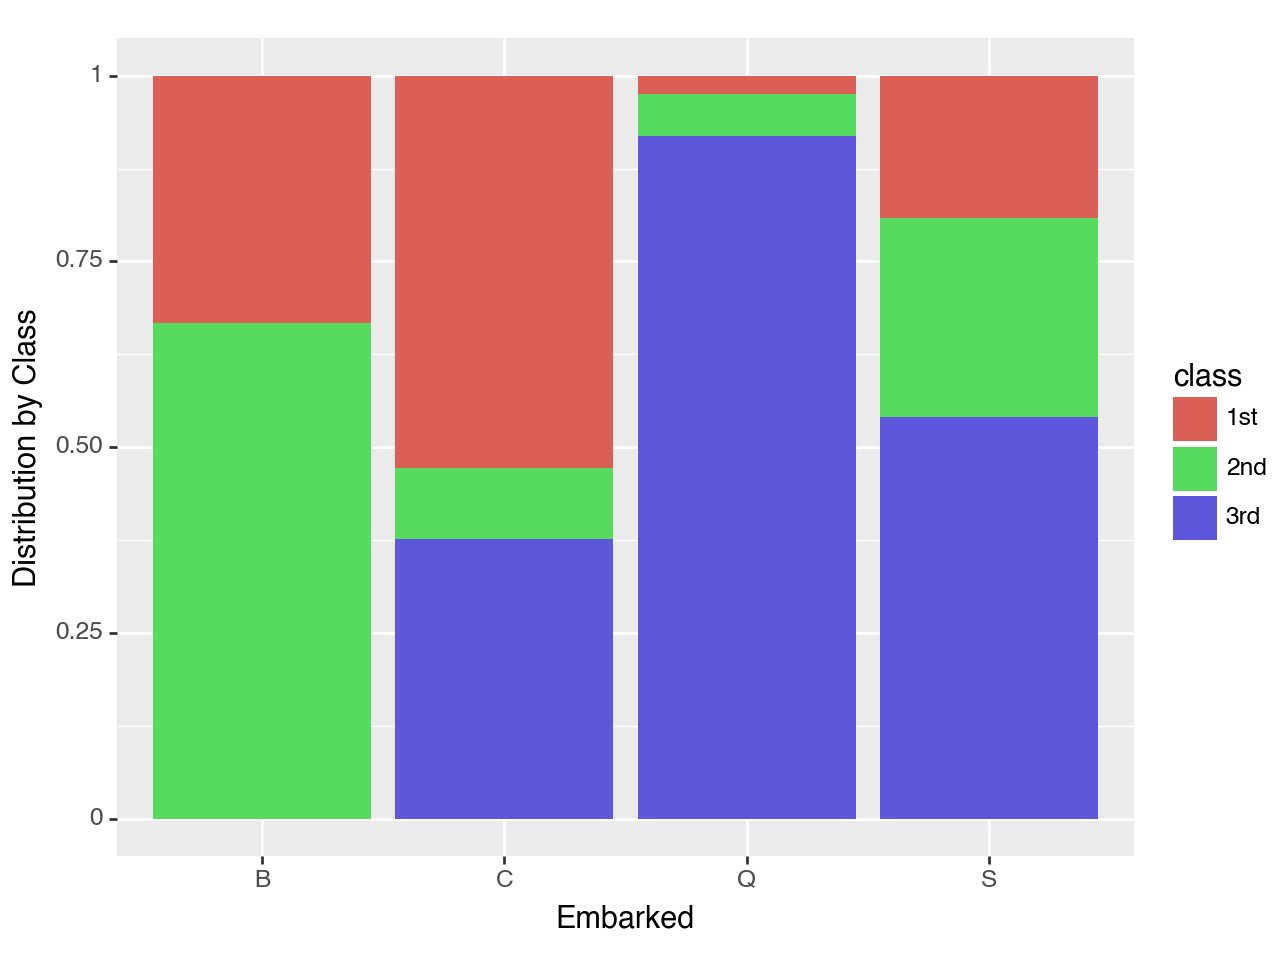

<Figure Size: (640 x 480)>

In [83]:
from plotnine import *
(ggplot(df_titanic,
aes(
  x = "embarked",
  fill = "class"
))
+ geom_bar(position = "fill")
+ labs(x="Embarked", y="Distribution by Class")
)

The visualization is pretty effective at giving a general idea of the proportions of class in comparison to where they embarked, which is much more convenient than having to sift through a dataframe to try to get the exact numbers. However, sometimes having the exact numbers is necessary or at least helpful, and it can be hard to pinpoint the exact distributions on this visualization.